# First, the training
**This is the third and final notebook that we run when we use our MLB Game Outcome model.**

This is a partial copy of the notebook where we iterated different models. We decided on Logistic Regression. So first we need to train the Logistic Regression model that we created using the training data (model_df), and then we add the live game data (from the Live_Data_Wrangling notebook) so the model can make predictions on the new data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
def clean_unnamed(df):
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns = ['Unnamed: 0'])
        return df
    print("Dataframe does not have 'Unnamed: 0' column.")

In [3]:
main_df = pd.read_csv('model_df.csv')

In [4]:
main_df.head()

,Unnamed: 0,Park,H_Win_Diff,H_Py_Diff,Home_Win,Run_Diff,W_L10_Diff,W_L30_Diff,BABIP_vs_SP,BABIP_vs_BP,...,OPS_Diff,RS/9_Diff,SIERA_Diff,SIERA_BP_Diff,WAR_Diff,WHIP_Diff,WHIP_BP_Diff,wOBA_Diff,xFIP_Diff,xFIP_BP_Diff
0,0,94,-4.0,-3.0,0,-45.0,-4.0,-4.0,-0.177,-0.040,...,-0.413,-6.35,1.78,0.41,0.0,-0.81,0.22,-0.161,1.77,0.36
1,1,100,0.0,-1.0,0,-22.0,0.0,0.0,0.097,0.060,...,-0.134,-1.50,-0.44,-0.87,-0.1,0.67,0.12,-0.053,-0.46,-1.50
2,2,103,3.0,3.0,1,42.0,3.0,3.0,0.257,0.088,...,0.329,-0.90,-0.91,0.53,-0.1,1.67,-0.31,0.127,1.39,0.78
3,3,104,0.0,0.0,1,9.0,0.0,0.0,0.062,-0.155,...,0.003,-1.59,-0.89,-0.63,0.0,0.23,-0.67,-0.008,-0.71,-1.59
4,4,102,-2.0,-1.0,1,-11.0,-2.0,-2.0,-0.192,-0.054,...,-0.231,0.00,1.28,1.48,0.1,0.33,0.36,-0.089,1.09,1.36


In [5]:
main_df = clean_unnamed(main_df)

In [6]:
main_df.head().T

,0,1,2,3,4
Park,94.000,100.000,103.000,104.000,102.000
H_Win_Diff,-4.000,0.000,3.000,0.000,-2.000
H_Py_Diff,-3.000,-1.000,3.000,0.000,-1.000
Home_Win,0.000,0.000,1.000,1.000,1.000
Run_Diff,-45.000,-22.000,42.000,9.000,-11.000
W_L10_Diff,-4.000,0.000,3.000,0.000,-2.000
W_L30_Diff,-4.000,0.000,3.000,0.000,-2.000
BABIP_vs_SP,-0.177,0.097,0.257,0.062,-0.192
BABIP_vs_BP,-0.040,0.060,0.088,-0.155,-0.054
BABIP_SP_vs_Hit,-0.160,-0.046,0.169,0.022,0.017


In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Park             4312 non-null   int64  
 1   H_Win_Diff       4312 non-null   float64
 2   H_Py_Diff        4312 non-null   float64
 3   Home_Win         4312 non-null   int64  
 4   Run_Diff         4312 non-null   float64
 5   W_L10_Diff       4312 non-null   float64
 6   W_L30_Diff       4312 non-null   float64
 7   BABIP_vs_SP      4312 non-null   float64
 8   BABIP_vs_BP      4312 non-null   float64
 9   BABIP_SP_vs_Hit  4312 non-null   float64
 10  BABIP_BP_vs_Hit  4312 non-null   float64
 11  Avg_Outs_Diff    4312 non-null   float64
 12  FIP_Diff         4312 non-null   float64
 13  FIP_BP_Diff      4312 non-null   float64
 14  ISO_Diff         4312 non-null   float64
 15  OPS_Diff         4312 non-null   float64
 16  RS/9_Diff        4312 non-null   float64
 17  SIERA_Diff    

In [8]:
main_df['Home_Win'].value_counts()

1    2323
0    1989
Name: Home_Win, dtype: int64

In [9]:
2323/4312

0.5387291280148423

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
X = main_df.drop(columns = 'Home_Win')

In [12]:
X.shape

(4312, 24)

In [13]:
main_df.shape

(4312, 25)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Park             4312 non-null   int64  
 1   H_Win_Diff       4312 non-null   float64
 2   H_Py_Diff        4312 non-null   float64
 3   Run_Diff         4312 non-null   float64
 4   W_L10_Diff       4312 non-null   float64
 5   W_L30_Diff       4312 non-null   float64
 6   BABIP_vs_SP      4312 non-null   float64
 7   BABIP_vs_BP      4312 non-null   float64
 8   BABIP_SP_vs_Hit  4312 non-null   float64
 9   BABIP_BP_vs_Hit  4312 non-null   float64
 10  Avg_Outs_Diff    4312 non-null   float64
 11  FIP_Diff         4312 non-null   float64
 12  FIP_BP_Diff      4312 non-null   float64
 13  ISO_Diff         4312 non-null   float64
 14  OPS_Diff         4312 non-null   float64
 15  RS/9_Diff        4312 non-null   float64
 16  SIERA_Diff       4312 non-null   float64
 17  SIERA_BP_Diff 

In [15]:
y = main_df['Home_Win']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled.mean(), X_train_scaled.std()

(-4.549478713067231e-17, 0.9999999999999999)

In [20]:
X_test_scaled.mean(), X_test_scaled.std()

(0.0037610276015557016, 0.9687478266146227)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [22]:
# Create a Logistic Regression classifier
lr = LogisticRegression()

In [23]:
# Define the hyperparameters to tune and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [24]:
# Perform hyperparameter tuning using cross-validation with accuracy scoring
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', verbose = 1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy', verbose=1)

In [25]:
# Get the best hyperparameters and the corresponding model
best_lr = grid_search.best_estimator_
best_params = grid_search.best_params_

In [26]:
print(best_lr)
print(best_params)

LogisticRegression(C=0.001)
{'C': 0.001}


In [27]:
# Train the model with the best hyperparameters on the full training set
best_lr.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001)

In [28]:
# Get predictions for the test set
y_pred_lr = best_lr.predict(X_test_scaled)

In [29]:
# Calculate the accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred_lr)


In [30]:
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.574739281575898


In [31]:
probs = best_lr.predict_proba(X_test_scaled)

In [32]:
print(probs)

[[0.41353705 0.58646295]
 [0.51804499 0.48195501]
 [0.4764191  0.5235809 ]
 ...
 [0.43705777 0.56294223]
 [0.39528342 0.60471658]
 [0.32319359 0.67680641]]


# Now for ... live game predictions!

In [33]:
import datetime as dt
from datetime import timedelta

In [34]:
today = dt.date.today()

In [35]:
today_str = str(today)

In [36]:
todays_game_data = pd.read_csv('Live_Game_Features_' + today_str + '.csv')

In [37]:
todays_game_data

,Away,Home,A_Starter,H_Starter,Date,Park,H_Win_Diff,H_Py_Diff,Run_Diff,W_L10_Diff,...,OPS_Diff,RS/9_Diff,SIERA_Diff,SIERA_BP_Diff,WAR_Diff,WHIP_Diff,WHIP_BP_Diff,wOBA_Diff,xFIP_Diff,xFIP_BP_Diff
0,CLE,CIN,Logan Allen,Graham Ashcraft,2023-08-15,107,5,-2.0,-22,-1,...,0.019,0.13,0.47,0.29,-0.3,0.04,-0.10,0.005,0.43,0.66
1,HOU,MIA,Cristian Javier,Johnny Cueto,2023-08-15,97,-5,-12.0,-118,-1,...,-0.089,-4.37,-0.24,-0.89,-1.5,-0.22,-0.09,-0.041,-0.35,-0.87
2,BOS,WSN,Nick Pivetta,Josiah Gray,2023-08-15,102,-9,-11.0,-118,2,...,0.003,-0.06,1.40,0.24,1.0,0.27,-0.03,0.006,1.09,0.31
3,PHI,TOR,Zack Wheeler,Yusei Kikuchi,2023-08-15,100,1,3.0,26,0,...,0.003,-0.22,0.55,-0.11,-2.9,0.12,-0.07,0.002,0.51,-0.14
4,PIT,NYM,Bailey Falter,David Peterson,2023-08-15,96,1,3.0,38,0,...,0.003,1.45,-0.87,0.82,0.0,0.06,0.26,0.004,-1.12,0.82
5,NYY,ATL,Luis Severino,Bryce Elder,2023-08-15,101,16,18.0,208,3,...,0.185,1.32,-0.43,0.15,2.2,-0.64,0.10,0.065,-0.81,0.03
6,DET,MIN,Alex Faedo,Bailey Ober,2023-08-15,101,9,15.0,139,1,...,0.109,-1.56,-0.41,-0.15,1.9,0.04,-0.03,0.044,-0.12,-0.07
7,LAA,TEX,Lucas Giolito,Jordan Montgomery,2023-08-15,101,12,19.0,209,5,...,0.063,-0.23,0.08,-0.65,1.3,-0.01,-0.51,0.031,-0.33,-0.49
8,CHW,CHC,Touki Toussaint,Kyle Hendricks,2023-08-15,102,14,15.0,159,2,...,0.179,0.63,-0.50,0.13,1.0,-0.28,-0.15,0.072,-0.14,-0.03
9,SEA,KCR,Emerson Hancock,Jordan Lyles,2023-08-15,103,-24,-20.0,-216,-3,...,0.027,2.69,-0.63,1.57,0.4,0.27,0.30,0.007,0.11,1.78


In [38]:
# cols_to_drop = todays_game_data.columns

Set the 5-column index again

In [39]:
todays_game_data = todays_game_data.set_index(['Away', 'Home', 'A_Starter', 'H_Starter', 'Date'])

In [40]:
todays_game_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14 entries, ('CLE', 'CIN', 'Logan Allen', 'Graham Ashcraft', '2023-08-15') to ('MIL', 'LAD', 'Adrian Houser', 'Bobby Miller', '2023-08-15')
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Park             14 non-null     int64  
 1   H_Win_Diff       14 non-null     int64  
 2   H_Py_Diff        14 non-null     float64
 3   Run_Diff         14 non-null     int64  
 4   W_L10_Diff       14 non-null     int64  
 5   W_L30_Diff       14 non-null     int64  
 6   BABIP_vs_SP      14 non-null     float64
 7   BABIP_vs_BP      14 non-null     float64
 8   BABIP_SP_vs_Hit  14 non-null     float64
 9   BABIP_BP_vs_Hit  14 non-null     float64
 10  Avg_Outs_Diff    14 non-null     float64
 11  FIP_Diff         14 non-null     float64
 12  FIP_BP_Diff      14 non-null     float64
 13  ISO_Diff         14 non-null     float64
 14  OPS_Diff         14 non-null     flo

In [41]:
X_new = scaler.transform(todays_game_data)

In [42]:
X_new.mean(), X_new.std()

(0.13700644647907828, 0.8915687128141783)

In [43]:
todays_pred = best_lr.predict(X_new)

The array of today's predictions

In [44]:
todays_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [45]:
todays_game_data['Pred'] = todays_pred

# Predict_proba
We need the predicted probabilities to derive money lines.

In [46]:
todays_probs = best_lr.predict_proba(X_new)

In [47]:
todays_probs

array([[0.47648118, 0.52351882],
       [0.50286475, 0.49713525],
       [0.49421477, 0.50578523],
       [0.49966779, 0.50033221],
       [0.48359662, 0.51640338],
       [0.37000509, 0.62999491],
       [0.38020107, 0.61979893],
       [0.35140051, 0.64859949],
       [0.36069658, 0.63930342],
       [0.56860617, 0.43139383],
       [0.49837895, 0.50162105],
       [0.51432207, 0.48567793],
       [0.53245243, 0.46754757],
       [0.44168788, 0.55831212]])

In [48]:
away_probs = [prob[0] for prob in todays_probs]
home_probs = [prob[1] for prob in todays_probs]

In [49]:
todays_game_data['Away_Prob'] = away_probs
todays_game_data['Home_Prob'] = home_probs

# Money lines
The formula that converts predicted probabilities to money lines.

If a team's money line is -200, that team is a heavy favorite. If the moneyline is -120, the team is a favorite but not nearly has heavy of a favorite as -200. A +130 moneyline indicates the team is an underdog. A +200 moneyline indicates the team is a heavy underdog.

In [50]:
moneylines = []
for probs in todays_probs:
    game_moneyline = []
    for prob in probs:
        if prob > .5:
            moneyline = np.round(-(prob)/(1-prob) * 100, 0)
        else:
            moneyline = np.round(((1 - prob)/(prob) * 100), 0)
        game_moneyline.append(moneyline)
    moneylines.append(game_moneyline)
        
        

In [51]:
moneylines

[[110.0, -110.0],
 [-101.0, 101.0],
 [102.0, -102.0],
 [100.0, -100.0],
 [107.0, -107.0],
 [170.0, -170.0],
 [163.0, -163.0],
 [185.0, -185.0],
 [177.0, -177.0],
 [-132.0, 132.0],
 [101.0, -101.0],
 [-106.0, 106.0],
 [-114.0, 114.0],
 [126.0, -126.0]]

In [52]:
away_ML = [ml[0] for ml in moneylines]
home_ML = [ml[1] for ml in moneylines]

In [53]:
todays_game_data['Away_ML'] = away_ML
todays_game_data['Home_ML'] = home_ML

In [54]:
# todays_results = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [55]:
todays_game_data['Result'] = None

In [56]:
todays_game_data['A_Amt_Bet'] = 0
todays_game_data['H_Amt_Bet'] = 0

In [57]:
# X_new

In [58]:
todays_game_data = todays_game_data[['Pred', 'Away_Prob', 'Home_Prob', 'Away_ML', 'Home_ML', 'A_Amt_Bet', 'H_Amt_Bet', 'Result']]

In [59]:
todays_game_data

,,,,,Pred,Away_Prob,Home_Prob,Away_ML,Home_ML,A_Amt_Bet,H_Amt_Bet,Result
Away,Home,A_Starter,H_Starter,Date,,,,,,,,
CLE,CIN,Logan Allen,Graham Ashcraft,2023-08-15,1,0.476481,0.523519,110.0,-110.0,0,0,None
HOU,MIA,Cristian Javier,Johnny Cueto,2023-08-15,0,0.502865,0.497135,-101.0,101.0,0,0,None
BOS,WSN,Nick Pivetta,Josiah Gray,2023-08-15,1,0.494215,0.505785,102.0,-102.0,0,0,None
PHI,TOR,Zack Wheeler,Yusei Kikuchi,2023-08-15,1,0.499668,0.500332,100.0,-100.0,0,0,None
PIT,NYM,Bailey Falter,David Peterson,2023-08-15,1,0.483597,0.516403,107.0,-107.0,0,0,None
NYY,ATL,Luis Severino,Bryce Elder,2023-08-15,1,0.370005,0.629995,170.0,-170.0,0,0,None
DET,MIN,Alex Faedo,Bailey Ober,2023-08-15,1,0.380201,0.619799,163.0,-163.0,0,0,None
LAA,TEX,Lucas Giolito,Jordan Montgomery,2023-08-15,1,0.351401,0.648599,185.0,-185.0,0,0,None
CHW,CHC,Touki Toussaint,Kyle Hendricks,2023-08-15,1,0.360697,0.639303,177.0,-177.0,0,0,None


# Predictions sorted by heaviest home favorite
Finally, we have our predictions, sorted by biggest home favorite.<br>

**Be sure to run the three cells that follow this displayed dataframe. It adds Money_Won and Profit columns and stores it in a CSV so that we can evaluate the model when we have the results of the games.**

We keep the starting pitchers' names here so that we can confirm one last time that the pitcher is starting before we put money down on the game.

In [60]:
todays_game_data_sorted = todays_game_data.sort_values(by = 'Home_ML')

In [61]:
todays_game_data_sorted

,,,,,Pred,Away_Prob,Home_Prob,Away_ML,Home_ML,A_Amt_Bet,H_Amt_Bet,Result
Away,Home,A_Starter,H_Starter,Date,,,,,,,,
LAA,TEX,Lucas Giolito,Jordan Montgomery,2023-08-15,1,0.351401,0.648599,185.0,-185.0,0,0,None
CHW,CHC,Touki Toussaint,Kyle Hendricks,2023-08-15,1,0.360697,0.639303,177.0,-177.0,0,0,None
NYY,ATL,Luis Severino,Bryce Elder,2023-08-15,1,0.370005,0.629995,170.0,-170.0,0,0,None
DET,MIN,Alex Faedo,Bailey Ober,2023-08-15,1,0.380201,0.619799,163.0,-163.0,0,0,None
MIL,LAD,Adrian Houser,Bobby Miller,2023-08-15,1,0.441688,0.558312,126.0,-126.0,0,0,None
CLE,CIN,Logan Allen,Graham Ashcraft,2023-08-15,1,0.476481,0.523519,110.0,-110.0,0,0,None
PIT,NYM,Bailey Falter,David Peterson,2023-08-15,1,0.483597,0.516403,107.0,-107.0,0,0,None
BOS,WSN,Nick Pivetta,Josiah Gray,2023-08-15,1,0.494215,0.505785,102.0,-102.0,0,0,None
ARI,COL,Joe Mantiply,Ty Blach,2023-08-15,1,0.498379,0.501621,101.0,-101.0,0,0,None


In [62]:
todays_game_data['Money_Won'] = 0

In [63]:
todays_game_data['Profit'] = 0

In [64]:
#Store in csv
filepath = r'C:\Users\Owner\Sports Betting\MLB_Game_Outcome\Predictions_Results_' + today_str + '.csv'
todays_game_data.to_csv(filepath)

# Decision Tree Classifier

In [231]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
params = {'max_depth': [2, 3, 4, 5, 6]}

In [233]:
dt = DecisionTreeClassifier()

In [234]:
grid_search_dt = GridSearchCV(dt, params, cv=5, scoring = 'accuracy', verbose = 1)

In [235]:
grid_search_dt.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6]}, scoring='accuracy',
             verbose=1)

In [236]:
# Get the best hyperparameters and the corresponding model
best_dt = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_

In [237]:
print(best_dt)
print(best_params_dt)

DecisionTreeClassifier(max_depth=2)
{'max_depth': 2}


In [238]:
best_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=2)

In [239]:
y_pred = best_dt.predict(X_test_scaled)

In [240]:
accuracy_dt = accuracy_score(y_test, y_pred)

In [241]:
print("Decision Tree Classifier accuracy on the test set:", accuracy_dt)

Decision Tree Classifier accuracy on the test set: 0.5643105446118193


In [242]:
optimal_models.update({'Decision Tree Classifier': {'max_depth': 2, 'test_accuracy': 0.564}})

# Voting Classifier

In [243]:
from sklearn.ensemble import VotingClassifier

In [244]:
knn_vote = KNeighborsClassifier(n_neighbors = 11)
lr_vote = LogisticRegression(C = 0.001, random_state = 42)
dt_vote = DecisionTreeClassifier(max_depth = 2, random_state = 42)

In [245]:
classifiers = [('K Nearest Neighbors', knn_vote), ('Logistic Regression', lr_vote), ('Decision Tree Classifier', dt_vote)]

In [246]:
vc = VotingClassifier(estimators = classifiers)

In [247]:
vc.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('K Nearest Neighbors',
                              KNeighborsClassifier(n_neighbors=11)),
                             ('Logistic Regression',
                              LogisticRegression(C=0.001, random_state=42)),
                             ('Decision Tree Classifier',
                              DecisionTreeClassifier(max_depth=2,
                                                     random_state=42))])

In [248]:
y_pred = vc.predict(X_test_scaled)

In [249]:
accuracy_vc = accuracy_score(y_test, y_pred)

In [250]:
print("Voting Classifier accuracy score:", accuracy_vc)

Voting Classifier accuracy score: 0.5770567786790266


In [251]:
optimal_models.update({'Voting Classifier': {'Models': ['KNN', 'Logistic Regression', 'Decision Tree Classifier'], 'test_accuracy': 0.577}})

In [252]:
optimal_models

{'KNN': {'n_neighbors': 11, 'test_accuracy': 0.555},
 'Logistic Regression': {'C': 0.001, 'test_accuracy': 0.575},
 'Decision Tree Classifier': {'max_depth': 2, 'test_accuracy': 0.564},
 'Voting Classifier': {'Models': ['KNN',
   'Logistic Regression',
   'Decision Tree Classifier'],
  'test_accuracy': 0.577}}

# Bagging Classifier

In [253]:
from sklearn.ensemble import BaggingClassifier

In [254]:
bc = BaggingClassifier(base_estimator = lr_vote, n_estimators = 300, n_jobs = -1)

In [255]:
bc.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.001, random_state=42),
                  n_estimators=300, n_jobs=-1)

In [256]:
y_pred = bc.predict(X_test_scaled)

In [257]:
bc_acc = accuracy_score(y_test, y_pred)

In [258]:
print("Bagging Classifier Accuracy:", bc_acc)

Bagging Classifier Accuracy: 0.5758980301274623


In [259]:
optimal_models.update({'Bagging Classifier': {'base_estimator': 'Logistic Regression', 'test_accuracy': 0.572}})

# Random Forest

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
rf = RandomForestClassifier(random_state = 42)

In [262]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [263]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [264]:
y_pred = rf.predict(X_test_scaled)

In [265]:
rf_acc = accuracy_score(y_test, y_pred)

In [266]:
print("Base Random Forest Accuracy:", rf_acc)

Base Random Forest Accuracy: 0.5538818076477404


In [267]:
# rf_params = {'max_depth': [2, 3, 4, 5], 'n_estimators': [200, 300, 400], 'max_features': ['auto', 'sqrt']}

In [268]:
# rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', verbose = 1)
# rf_cv.fit(X_train_scaled, y_train)

In [269]:
# rf_cv.best_params_

In [270]:
# rf_tuned = rf_cv.best_estimator_

In [271]:
best_rf_cv_score = 0.5816141856502808

In [272]:
rf_tuned = RandomForestClassifier(max_depth = 5, n_estimators = 200, random_state = 42)

In [273]:
rf_tuned.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [274]:
y_pred = rf_tuned.predict(X_test_scaled)

In [275]:
rf_tuned_acc = accuracy_score(y_test, y_pred)

In [276]:
print("Tuned Random Forest Accuracy:", rf_tuned_acc)

Tuned Random Forest Accuracy: 0.5608342989571263


In [277]:
optimal_models.update({'Random Forest': {'max_depth': 5, 'n_estimators': 200, 'test_accuracy': 0.561}})

# AdaBoost

In [278]:
from sklearn.ensemble import AdaBoostClassifier

In [279]:
base_dt = DecisionTreeClassifier(max_depth = 1, random_state = 42)

In [280]:
adb_clf = AdaBoostClassifier(base_estimator = base_dt, n_estimators = 200, random_state = 42)

In [281]:
adb_clf.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=42),
                   n_estimators=200, random_state=42)

In [282]:
y_pred = adb_clf.predict(X_test_scaled)

In [283]:
adb_acc = accuracy_score(y_test, y_pred)

In [284]:
print("Ada Boost Accuracy:", adb_acc)

Ada Boost Accuracy: 0.5561993047508691


In [285]:
optimal_models.update({'AdaBoost': {'base_model': 'Decision Tree', 'n_estimators': 200, 'test_accuracy' : 0.556}})

# Gradient Boost

In [286]:
from sklearn.ensemble import GradientBoostingClassifier

In [287]:
base_gb = GradientBoostingClassifier(random_state = 42)

In [288]:
base_gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [289]:
y_pred = base_gb.predict(X_test_scaled)

In [290]:
base_gb_acc = accuracy_score(y_test, y_pred)

In [291]:
print("Base Gradient Boosting Accuracy:", base_gb_acc)

Base Gradient Boosting Accuracy: 0.5480880648899189


In [292]:
# gb_params = {'n_estimators': [100, 200], 'max_depth': [2, 3, 4, 5], 'learning_rate': [0.05, 0.1, 0.2]}

In [293]:
# gb_cv = GridSearchCV(base_gb, gb_params, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [294]:
# gb_cv.fit(X_train_scaled, y_train)

In [295]:
# gb_cv.best_params_

In [296]:
gb_tuned = GradientBoostingClassifier(learning_rate = 0.05, max_depth = 3, n_estimators = 100, random_state = 42)

In [297]:
# gb_cv.best_score_

In [298]:
gb_tuned.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.05, random_state=42)

In [299]:
y_pred = gb_tuned.predict(X_test_scaled)

In [300]:
gb_tuned_acc = accuracy_score(y_test, y_pred)

In [301]:
print("Tuned Gradient Boosting Accuracy:", gb_tuned_acc)

Tuned Gradient Boosting Accuracy: 0.5480880648899189


In [302]:
optimal_models.update({'Gradient Boost': {'learning_rate' : 0.05, 'max_depth': 3, 'n_estimators': 100, 'test_accuracy': 0.548}})

# XGBoost

In [303]:
import xgboost as xgb

In [304]:
clf_xgb = xgb.XGBClassifier(random_state = 42)

In [305]:
clf_xgb.fit(X_train_scaled, y_train)

[07:58:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Owner\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [306]:
y_pred = clf_xgb.predict(X_test_scaled)

In [307]:
clf_xgb_acc = accuracy_score(y_test, y_pred)

In [308]:
print("XGBoost Accuracy", clf_xgb_acc)

XGBoost Accuracy 0.5237543453070683


In [309]:
params = {'max_depth': [2, 3, 4, 5, 6], 'learning_rate' : [0.01, 0.1, 0.5], 'colsample_bytree': [0.5, 0.75, 1], 'n_estimators': [50, 100, 150, 200]}

In [310]:
# xg_cv = GridSearchCV(clf_xgb, params, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)
# xg_cv.fit(X_train_scaled, y_train)
# print(f"Best Accuracy: {xg_cv.best_score_}")
# print(f"Best Params: {xg_cv.best_params_}")

In [311]:
# gb_cv = GridSearchCV(base_gb, gb_params, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [312]:
est_values = []

In [313]:
for i in range(200, 510, 10):
    est_values.append(i)

In [314]:
len(est_values)

31

In [315]:
params2 = {'max_depth': [3], 'learning_rate' : [0.0001, 0.001, 0.01], 'colsample_bytree': [0.75], 'n_estimators': est_values}

In [316]:
# xg_cv2 = GridSearchCV(clf_xgb, params2, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)
# xg_cv2.fit(X_train_scaled, y_train)
# print(f"Best Accuracy: {xg_cv2.best_score_}")
# print(f"Best Params: {xg_cv2.best_params_}")

In [317]:
tuned_xgb = xgb.XGBClassifier(colsample_bytree = 0.75, learning_rate = 0.01, max_depth = 3, n_estimators = 270, random_state = 42)

In [318]:
tuned_xgb.fit(X_train_scaled, y_train)

[07:58:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=270, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [319]:
y_pred = tuned_xgb.predict(X_test_scaled)

In [320]:
xgb_tuned_acc = accuracy_score(y_test, y_pred)

In [321]:
print("XGBoost Accuracy:", xgb_tuned_acc)

XGBoost Accuracy: 0.5330243337195828


In [322]:
optimal_models.update({'XGBoost': {'learning_rate': 0.01, 'max_depth': 3, 'colsample_bytree' : 0.75, 'n_estimators': 270, 'test_accuracy': 0.533}})

In [323]:
optimal_models

{'KNN': {'n_neighbors': 11, 'test_accuracy': 0.555},
 'Logistic Regression': {'C': 0.001, 'test_accuracy': 0.575},
 'Decision Tree Classifier': {'max_depth': 2, 'test_accuracy': 0.564},
 'Voting Classifier': {'Models': ['KNN',
   'Logistic Regression',
   'Decision Tree Classifier'],
  'test_accuracy': 0.577},
 'Bagging Classifier': {'base_estimator': 'Logistic Regression',
  'test_accuracy': 0.572},
 'Random Forest': {'max_depth': 5,
  'n_estimators': 200,
  'test_accuracy': 0.561},
 'AdaBoost': {'base_model': 'Decision Tree',
  'n_estimators': 200,
  'test_accuracy': 0.556},
 'Gradient Boost': {'learning_rate': 0.05,
  'max_depth': 3,
  'n_estimators': 100,
  'test_accuracy': 0.548},
 'XGBoost': {'learning_rate': 0.01,
  'max_depth': 3,
  'colsample_bytree': 0.75,
  'n_estimators': 270,
  'test_accuracy': 0.533}}

# Voting Classifier (different models)

In [324]:
lr_vote = LogisticRegression(C = 0.001, random_state = 42)
dt_vote = DecisionTreeClassifier(max_depth = 2, random_state = 42)
bc_vote = BaggingClassifier(base_estimator = lr_vote, n_estimators = 300, n_jobs = -1, random_state = 42)
rf_vote = RandomForestClassifier(max_depth = 5, n_estimators = 200, random_state = 42)
ab_vote = AdaBoostClassifier(base_estimator = base_dt, n_estimators = 200, random_state = 42)

In [325]:
classifiers = [('Logistic Regression', lr_vote), ('Decision Tree', dt_vote),\
              ('Bagging', bc_vote), ('Random Forest', rf_vote), ('Ada Boost', ab_vote)]

In [326]:
vc = VotingClassifier(estimators = classifiers)

In [327]:
vc.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=0.001, random_state=42)),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=2,
                                                     random_state=42)),
                             ('Bagging',
                              BaggingClassifier(base_estimator=LogisticRegression(C=0.001,
                                                                                  random_state=42),
                                                n_estimators=300, n_jobs=-1,
                                                random_state=42)),
                             ('Random Forest',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('Ada Boost',
          

In [328]:
y_pred = vc.predict(X_test_scaled)

In [329]:
accuracy_vc = accuracy_score(y_test, y_pred)

In [330]:
print("Voting Classifier accuracy score:", accuracy_vc)

Voting Classifier accuracy score: 0.5654692931633836


# Gaussian Naive Bayes

In [331]:
from sklearn.naive_bayes import GaussianNB

In [332]:
nb = GaussianNB()

In [333]:
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [334]:
y_pred = nb.predict(X_test_scaled)

In [335]:
nb_acc = accuracy_score(y_test, y_pred)

In [336]:
print("Naive Bayes Accuracy:", nb_acc)

Naive Bayes Accuracy: 0.5469293163383546


In [337]:
optimal_models.update({'Naive Bayes': {'test_accuracy': 0.547}})

# Support Vector Classifier

In [338]:
from sklearn.svm import SVC

In [339]:
svm = SVC()

In [340]:
svm.fit(X_train_scaled, y_train)

SVC()

In [341]:
y_pred = svm.predict(X_test_scaled)

In [342]:
svm_acc = accuracy_score(y_test, y_pred)

In [343]:
print("Support Vector Machine Accuracy Score:", svm_acc)

Support Vector Machine Accuracy Score: 0.5619930475086906


In [344]:
params = {'C' : [0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}

In [345]:
svm_cv = GridSearchCV(svm, params, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)
svm_cv.fit(X_train_scaled, y_train)
print("Best params:", svm_cv.best_params_)
print("Best score:", svm_cv.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   12.6s finished


Best params: {'C': 1, 'gamma': 0.001}
Best score: 0.5842258261290254


In [346]:
tuned_svm = svm_cv.best_estimator_

In [347]:
tuned_svm

SVC(C=1, gamma=0.001)

In [348]:
tuned_svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.001)

In [349]:
y_pred = tuned_svm.predict(X_test_scaled)

In [350]:
svm_acc = accuracy_score(y_test, y_pred)

In [351]:
print("Support Vector Machine Accuracy:", svm_acc)

Support Vector Machine Accuracy: 0.5677867902665121


In [352]:
optimal_models.update({'Support Vector Machine': {'C': 1, 'gamma': 0.001, 'test_accuracy': 0.568}})

In [353]:
results_df = pd.DataFrame(optimal_models)

In [354]:
results_df.T.sort_values(by='test_accuracy', ascending = False)['test_accuracy']

Voting Classifier           0.577
Logistic Regression         0.575
Bagging Classifier          0.572
Support Vector Machine      0.568
Decision Tree Classifier    0.564
Random Forest               0.561
AdaBoost                    0.556
KNN                         0.555
Gradient Boost              0.548
Naive Bayes                 0.547
XGBoost                     0.533
Name: test_accuracy, dtype: object

In [355]:
results_df

,KNN,Logistic Regression,Decision Tree Classifier,Voting Classifier,Bagging Classifier,Random Forest,AdaBoost,Gradient Boost,XGBoost,Naive Bayes,Support Vector Machine
n_neighbors,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_accuracy,0.555,0.575,0.564,0.577,0.572,0.561,0.556,0.548,0.533,0.547,0.568
C,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000
max_depth,NaN,NaN,2.000,NaN,NaN,5.000,NaN,3.000,3.000,NaN,NaN
Models,NaN,NaN,NaN,"[KNN, Logistic Regression, Decision Tree Class...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
base_estimator,NaN,NaN,NaN,NaN,Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN
n_estimators,NaN,NaN,NaN,NaN,NaN,200.000,200,100.000,270.000,NaN,NaN
base_model,NaN,NaN,NaN,NaN,NaN,NaN,Decision Tree,NaN,NaN,NaN,NaN
learning_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050,0.010,NaN,NaN
colsample_bytree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750,NaN,NaN


In [356]:
test_acc_df = pd.DataFrame(results_df.T['test_accuracy'])

In [357]:
test_acc_df

,test_accuracy
KNN,0.555
Logistic Regression,0.575
Decision Tree Classifier,0.564
Voting Classifier,0.577
Bagging Classifier,0.572
Random Forest,0.561
AdaBoost,0.556
Gradient Boost,0.548
XGBoost,0.533
Naive Bayes,0.547


In [358]:
test_acc_df = test_acc_df.drop('Voting Classifier')

In [359]:
test_acc_df

,test_accuracy
KNN,0.555
Logistic Regression,0.575
Decision Tree Classifier,0.564
Bagging Classifier,0.572
Random Forest,0.561
AdaBoost,0.556
Gradient Boost,0.548
XGBoost,0.533
Naive Bayes,0.547
Support Vector Machine,0.568


# And the winner is ...

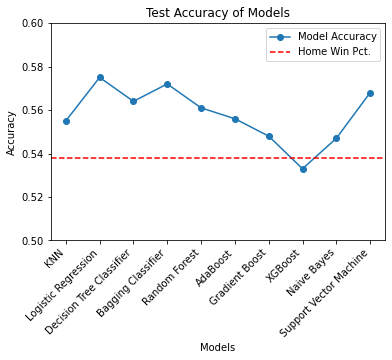

In [360]:
# Set the y-axis range
y_min = 0.5
y_max = 0.6

# Horizontal line value
horizontal_line = 0.538

# Create the plot
fig, ax = plt.subplots()

# Plot the values
ax.plot(test_acc_df['test_accuracy'], 'o-', label='Model Accuracy')

# Set y-axis limits
ax.set_ylim(y_min, y_max)

# Add a horizontal line
ax.axhline(y=horizontal_line, color='r', linestyle='--', label='Home Win Pct.')

# Set x-axis labels
ax.set_xticks(range(len(test_acc_df.index)))
ax.set_xticklabels(test_acc_df.index, rotation=45, ha='right')

# Set axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Test Accuracy of Models')

# Add legend
ax.legend()

# Show the plot
#plt.tight_layout()
plt.show()





# Logistic Regression!
Our best model is Logistic Regression with a test set accuracy of 0.575.<br>

Our Voting Classifier, which included Logistic Regression, KNN and Decision Tree Classifier, achieved 57.7 accuracy on the test set, but that was with hard voting. In order for predicted probabilities to be available, we needed soft voting, and that reduced the accuracy. We need the predicted probabilities when deploying this model live, so the Voting Classifier isn't viable.<br>

The test set contains 56.1 percent true positive labels. Logistic Regression makes positive predictions on 67.1 percent of the test set. So it's not just guessing the positive class for every sample.

In [376]:
pct_pos_pred = y_pred_lr.sum()/len(y_test)

In [377]:
print(f"Percentage of Positive Predictions: {pct_pos_pred}")

Percentage of Positive Predictions: 0.6709154113557358


In [361]:
from sklearn.metrics import classification_report

In [364]:
from sklearn.metrics import confusion_matrix

In [362]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.52      0.39      0.45       379
           1       0.60      0.72      0.65       484

    accuracy                           0.57       863
   macro avg       0.56      0.55      0.55       863
weighted avg       0.57      0.57      0.56       863



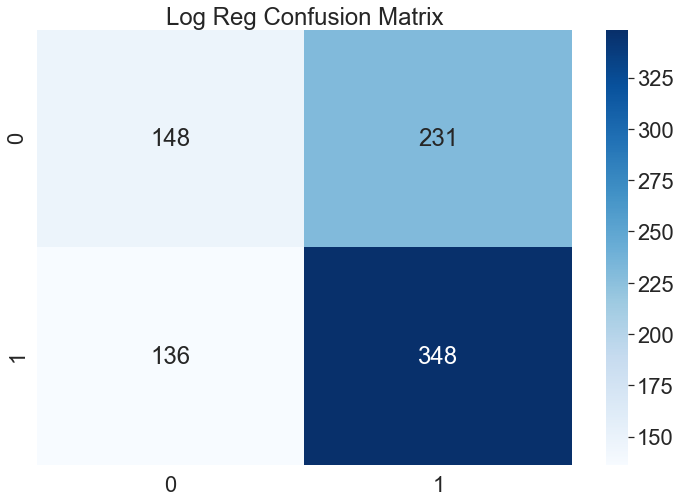

In [375]:
sns.set(rc = {'figure.figsize':(12,8)}, font_scale = 2)
clf_cmatrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(clf_cmatrix, fmt = 'd', annot = True, cmap = 'Blues').set(title = 'Log Reg Confusion Matrix');

In [192]:
# print(f"Test set samples: {len(y_pred)}")
# print(f"True Positives: {y_test.sum()}")
# print(f"% of True Positives: {pct_true_pos}")
# print(f"Positive Class Predictions: {y_pred.sum()}")
# print(f"% of Positive Class Predictions: {pct_pos_pred}")

Test set samples: 863
True Positives: 484
% of True Positives: 0.5608342989571263
Positive Class Predictions: 599
% of Positive Class Predictions: 0.694090382387022


In [169]:
# lr_vote = LogisticRegression(C = 0.001, random_state = 42)
# #svm_vote = SVC(C = 1, gamma = 0.001, random_state = 42)
# #bc_vote = BaggingClassifier(base_estimator = lr_vote, n_estimators = 300, n_jobs = -1, random_state = 42)
# dt_vote = DecisionTreeClassifier(max_depth = 2, random_state = 42)
# #rf_vote = RandomForestClassifier(max_depth = 5, n_estimators = 200, random_state = 42)
# #ab_vote = AdaBoostClassifier(base_estimator = base_dt, n_estimators = 200, random_state = 42)
# knn_vote = KNeighborsClassifier(n_neighbors = 11)

In [170]:
# classifiers = [('Logistic Regression', lr_vote), ('KNN', knn_vote), ('Decision Tree', dt_vote)]

In [171]:
# vc = VotingClassifier(estimators = classifiers, voting = 'soft')

In [172]:
# vc.fit(X_train_scaled, y_train)

In [173]:
# y_pred = vc.predict(X_test_scaled)

In [174]:
# accuracy_vc = accuracy_score(y_test, y_pred)

In [175]:
# print("Voting Classifier Accuracy:", accuracy_vc)

In [176]:
# vc.predict_proba(X_test_scaled)